In [2]:
using Plots
using DifferentialEquations
using SparseArrays


In [3]:
n_masses = 5
k_lst = 5*ones(1,n_masses+1)
c_lst = 0.2*ones(1,n_masses+1)  
f_lst = zeros(1,n_masses) #N
mass_vec = 0.1* ones(n_masses) #kg

tStart = 0
tEnd = 20;

In [4]:
#IC's
x0 = ones(n_masses)
xdot0 = zeros(n_masses);

In [5]:
function equation!(du, u, p, t)
    n = p[1]
    m, k, c = p[2], p[3], p[4]
    
    x = u[1:n]  
    v = u[n+1:2*n]  
    
    for i in 1:n
        du[i] = v[i]  
        
        if i == 1
            # First mass  
            du[n + i] = (-k[i]*x[i] - c[i]*v[i] + k[i+1]*(x[i+1] - x[i]) + c[i+1]*(v[i+1] - v[i])) / m[i] 
        elseif i == n
            # Last mass 
            du[n + i] = (-k[i]*(x[i] - x[i-1]) - c[i]*(v[i] - v[i-1]) -k[i+1]*x[i] - c[i]*v[i]) / m[i] 
        else
            # Intermediate masses
            du[n + i] = (-k[i]*(x[i] - x[i-1]) - c[i]*(v[i] - v[i-1]) + k[i+1]*(x[i+1] - x[i]) + c[i+1]*(v[i+1] - v[i])) / m[i] 
        end
    end
end;

In [6]:
u0 = vcat(x0, xdot0)

param = [n_masses, mass_vec, k_lst, c_lst]

ode = ODEProblem(equation!, u0, (0.0, tEnd), param)
ode_sol = solve(ode, Euler(), dt = 0.01)

ode_time = ode_sol.t

positions_ode = [ode_sol[i, :] for i in 1:n_masses];

┌ Warning: Using arrays or dicts to store parameters of different types can hurt performance.
│ Consider using tuples instead.
└ @ SciMLBase C:\Users\singh\.julia\packages\SciMLBase\M57fR\src\performance_warnings.jl:33


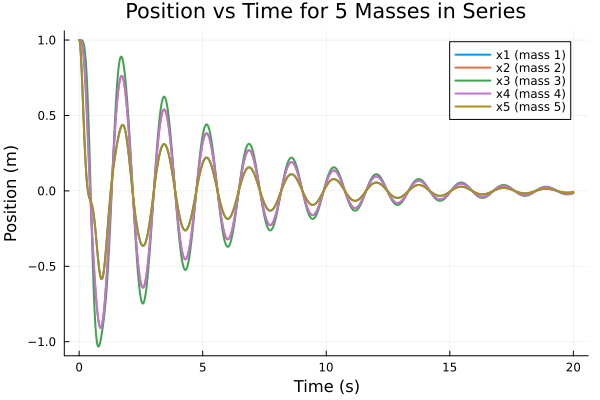

In [7]:
plot(ode_time, positions_ode[1], label="x1 (mass 1)", xlabel="Time (s)", ylabel="Position (m)", linewidth=2)
for i in 2:n_masses
    plot!(ode_time, positions_ode[i], label="x$i (mass $i)", linewidth=2)
end
title!("Position vs Time for $n_masses Masses in Series")

┌ Info: Saved animation to c:\Users\singh\OneDrive\Desktop\Aerospace\CSE\minor project\horizontal_masses_fixed_axis_moving.gif
└ @ Plots C:\Users\singh\.julia\packages\Plots\kLeqV\src\animation.jl:156


Plots.AnimatedGif("c:\\Users\\singh\\OneDrive\\Desktop\\Aerospace\\CSE\\minor project\\horizontal_masses_fixed_axis_moving.gif")
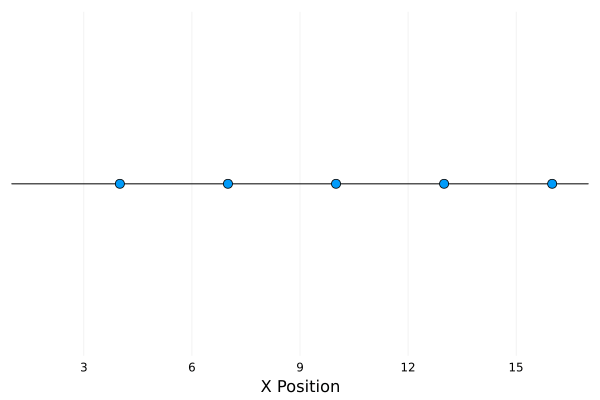

In [12]:
spacing = 3.0  # Distance between each mass along the x-axis
xlims_fixed = (spacing-2, spacing * n_masses + 2)  # Fixed limits for the x-axis

anim = @animate for t_idx in 1:length(ode_time)
    # Positions of all masses at time step t_idx, plus their spacing
    x_positions = [spacing * i + ode_sol[i, t_idx] for i in 1:n_masses]
    
    # Plot masses as points with horizontal movement and fixed x-axis
    plot(x_positions, zeros(n_masses),
         seriestype = :scatter, xlabel = "X Position", ylabel = "",
         xlims = xlims_fixed, ylims = (-1, 1), legend = false, markersize = 5, grid = true)

    # Remove tick labels and axis numbers
    plot!(ytick = false, framestyle = :zerolines)

end

# Save the animation as a GIF
gif(anim, "horizontal_masses_fixed_axis_moving.gif", fps = 30)
